In [1]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("G:/Projects/House Sales Prediction/housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = X_train.select_dtypes(include=[np.number]).columns
categorical_features = X_train.select_dtypes(include=[object]).columns

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

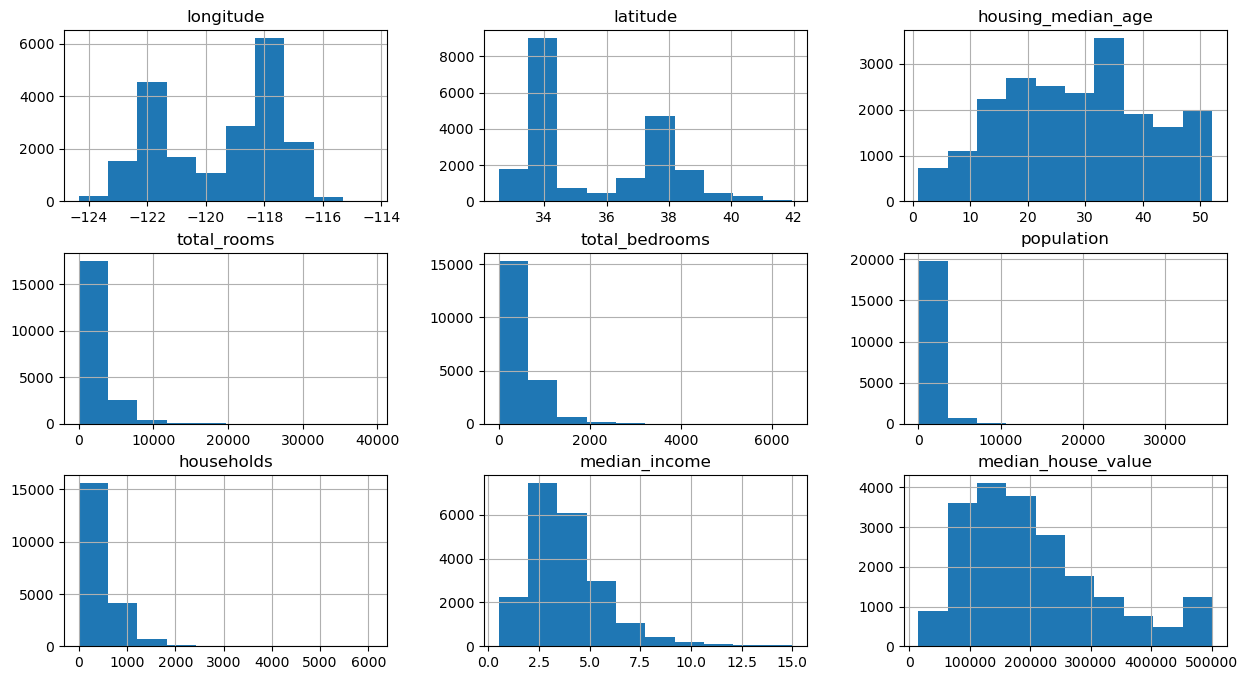

In [7]:
data.hist(figsize = (15,8))

In [8]:
 # Impute missing values in numerical columns only
imputer = SimpleImputer(strategy='median')
X_train[numerical_features] = imputer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = imputer.transform(X_test[numerical_features])

In [9]:
# Apply log transformation to certain numerical features to normalize distributions
X_train['total_rooms'] = np.log(X_train['total_rooms'] + 1)
X_train['total_bedrooms'] = np.log(X_train['total_bedrooms'] + 1)
X_train['population'] = np.log(X_train['population'] + 1)
X_train['households'] = np.log(X_train['households'] + 1)

X_test['total_rooms'] = np.log(X_test['total_rooms'] + 1)
X_test['total_bedrooms'] = np.log(X_test['total_bedrooms'] + 1)
X_test['population'] = np.log(X_test['population'] + 1)
X_test['households'] = np.log(X_test['households'] + 1)

<Axes: xlabel='latitude', ylabel='longitude'>

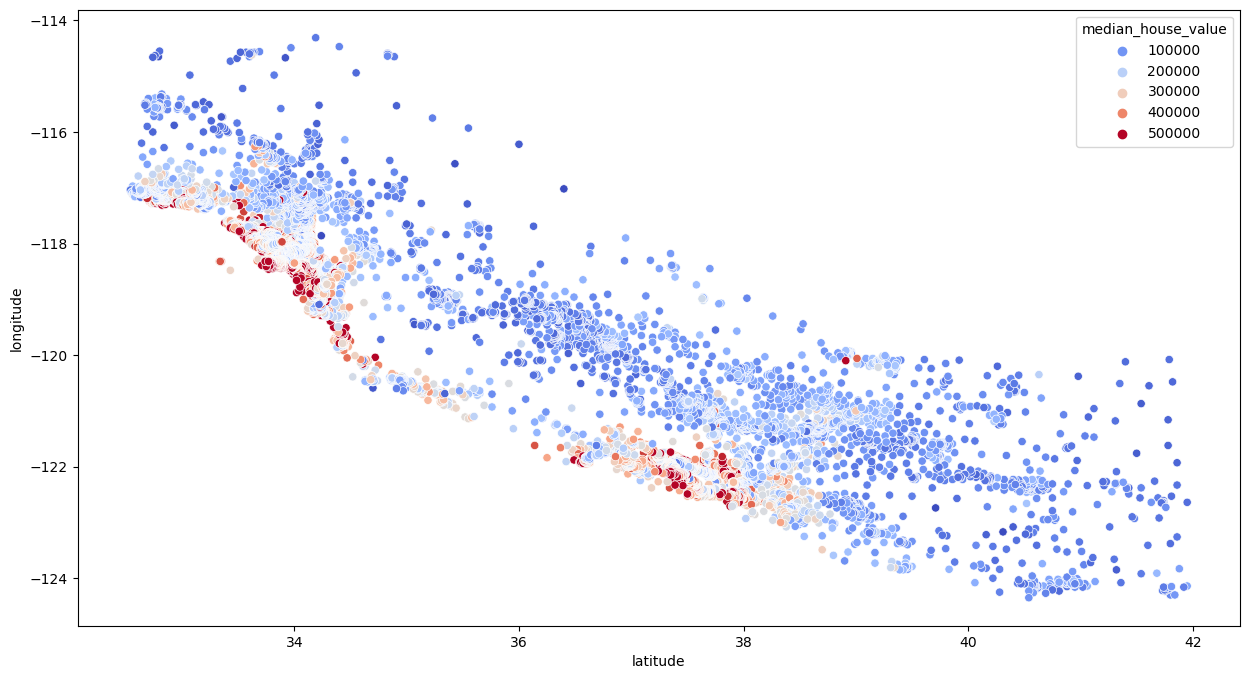

In [10]:
plt.figure(figsize = (15,8))
sns.scatterplot(x = "latitude", y = "longitude", data = data, hue = "median_house_value", palette = "coolwarm")

C:\Users\adity\AppData\Local\Temp\ipykernel_16728\2565555413.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")


<Axes: >

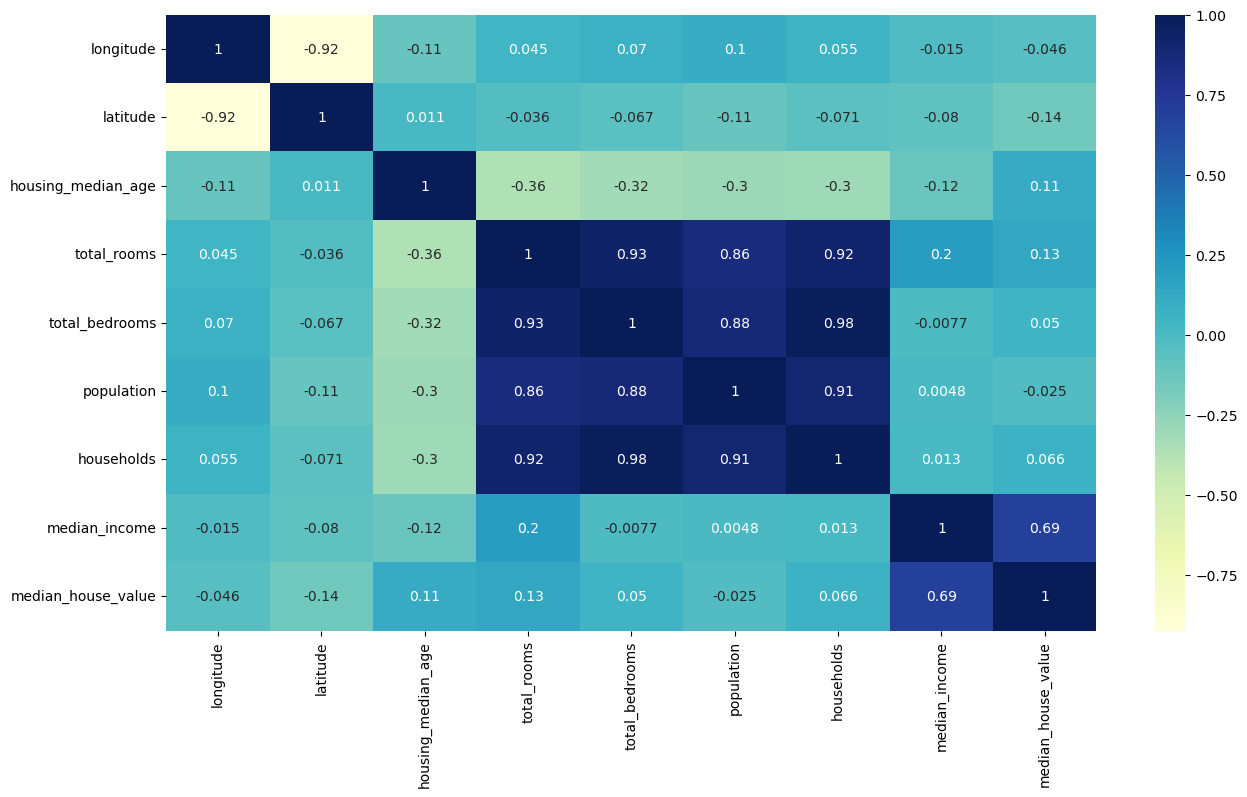

In [11]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu")

In [12]:
X_train = X_train.join(pd.get_dummies(X_train['ocean_proximity'])).drop(['ocean_proximity'], axis=1)
X_test = X_test.join(pd.get_dummies(X_test['ocean_proximity'])).drop(['ocean_proximity'], axis=1)

# Feature engineering - create new ratios
X_train['bedroom_ratio'] = X_train['total_bedrooms'] / X_train['total_rooms']
X_train['household_room'] = X_train['total_rooms'] / X_train['households']

X_test['bedroom_ratio'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['household_room'] = X_test['total_rooms'] / X_test['households']

In [13]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4768688076.405537
R-squared: 0.6360916205864944


In [14]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_test_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error and R-squared for the test set
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Random Forest Testing Mean Squared Error:", mse_test)
print("Random Forest Testing R-squared:", r2_test)

Random Forest Testing Mean Squared Error: 2542154751.629581
Random Forest Testing R-squared: 0.8060029506938984


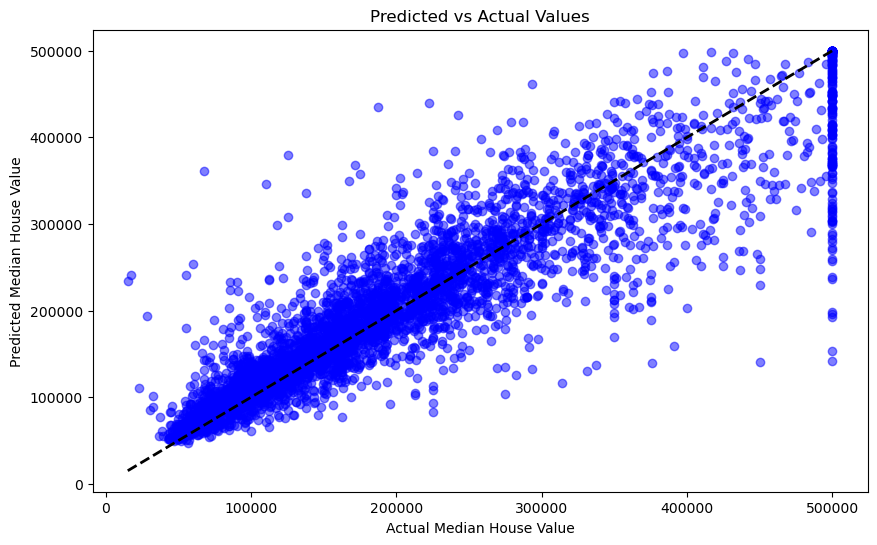

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Predicted vs Actual Values")
plt.show()

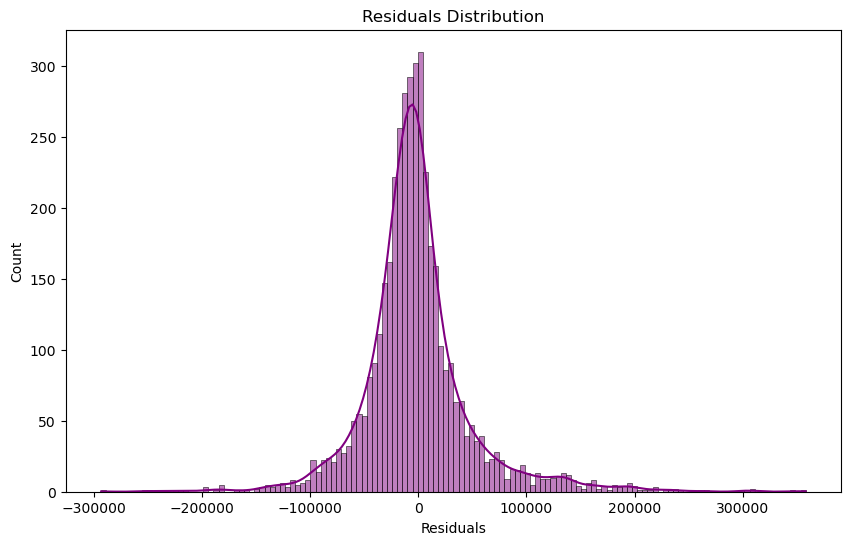

In [16]:
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.xlabel("Residuals")
plt.title("Residuals Distribution")
plt.show()

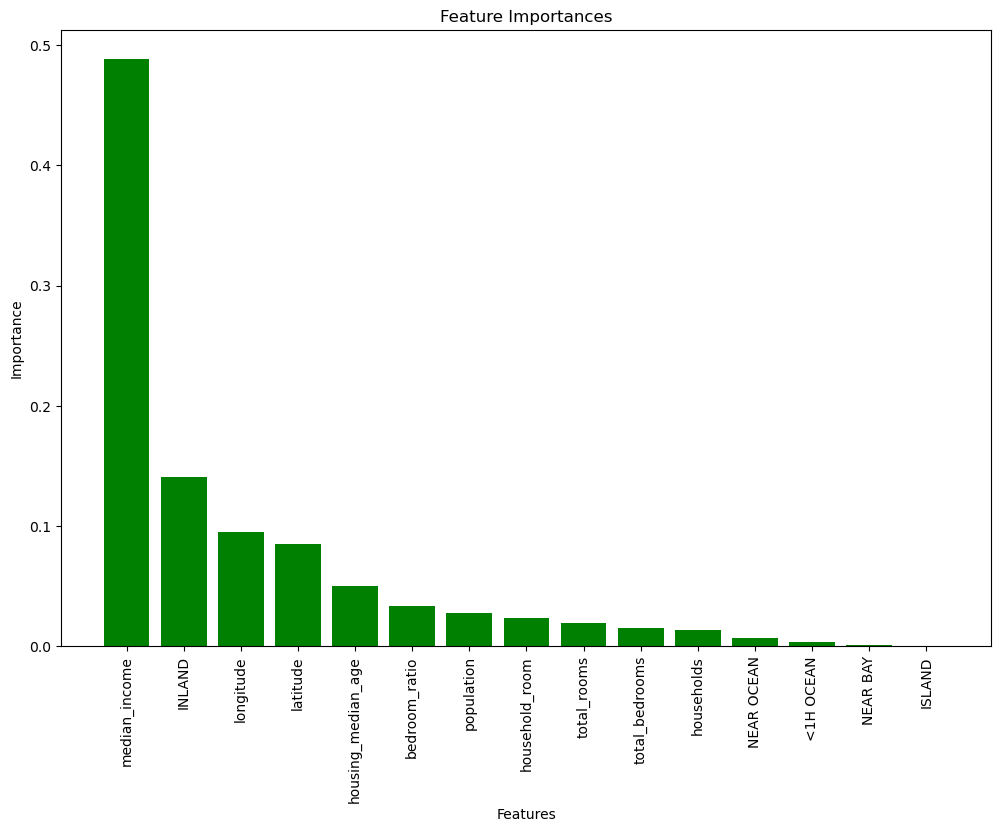

In [17]:
importances = rf_model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="green", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()